Code to generate panels found in Supplementary Figures 1-4

In [3]:
library(Seurat)
library(Signac)
library(ggplot2)
library(scCustomize)
library(dittoSeq)
set.seed(1234)

blank_theme <- theme(
  axis.line=element_blank(),
  axis.text.x=element_blank(),
  axis.text.y=element_blank(),
  axis.ticks=element_blank(),
  axis.title.x=element_blank(),
  axis.title.y=element_blank(),
  panel.background=element_blank(),
  panel.border=element_blank(),
  panel.grid.major=element_blank(),
  panel.grid.minor=element_blank(),
  plot.background=element_blank()
)

sex_colors <- c("male" = "#FD7E23", "female" = "#33ABDD")
diagnosis_colors<-c("control" = "#E69F00", "C9ALS" = "#009E73", "sALS" = "#0072B2")
class_colors <- c("#EE6677","#228833","#4477AA","#CCBB44","#66CCEE","#AA3377","#BBBBBB")
subclass_colors <-c("#5A5156", "#E4E1E3", "#F6222E", "#FE00FA", "#16FF32", "#3283FE", 
                   "#FEAF16", "#B00068", "#1CFFCE", "#90AD1C", "#2ED9FF", "#DEA0FD", "#AA0DFE",
                   "#F8A19F", "#325A9B", "#C4451C", "#1C8356", "#85660D", "#B10DA1", "#FBE426",
                   "#1CBE4F", "#FA0087", "#FC1CBF")


scCustomize v1.1.3
If you find the scCustomize useful please cite.
See 'samuel-marsh.github.io/scCustomize/articles/FAQ.html' for citation info.



In [4]:
snRNA_age<-c(50,59,72,72,53,48,
             60,60,58,47,59,72,71,66,88,
             59,57,65,88,43,72,37,50)
snRNA_sex<-c("female","male","female","male","female","female",
             "male","male","male","female","female","male","female","female","female",
             "male","female","male","female","male","female","male","male"
)
snRNA_samples<-c("CTRL1","CTRL2","CTRL3","CTRL4","CTRL5","CTRL6",
                 "C9ALS1","C9ALS2","C9ALS3","C9ALS4","C9ALS5","C9ALS6","C9ALS1","C9ALS2","C9ALS3",
                 "sALS1","sALS2","sALS3","sALS4","sALS5","sALS6","sALS7","sALS8"
)
snRNA_diagnosis<-c("control","control","control","control","control","control",
                   "C9ALS","C9ALS","C9ALS","C9ALS","C9ALS","C9ALS","C9ALS","C9ALS","C9ALS",
                   "sALS","sALS","sALS","sALS","sALS","sALS","sALS","sALS"
)
snRNA_age_data<-data.frame(snRNA_samples,snRNA_diagnosis,snRNA_age,snRNA_sex)

#snATAC age and condition data
snATAC_age<-c(50,59,72,72,
              60,60,58,59,72,57,
              71,66,88,
              59,57,65,88,43,72,37,50)
snATAC_sex<-c("female","male","female","male",
              "male","male","male","female","male","male",
              "female","female","female",
              "male","female","male","female","male","female","male","male"
)
snATAC_samples<-c("CTRL1","CTRL2","CTRL3","CTRL4",
                  "C9ALS1","C9ALS2","C9ALS3","C9ALS5","C9ALS6","C9ALS7","C9ALS1","C9ALS2","C9ALS3",
                  "sALS1","sALS2","sALS3","sALS4","sALS5","sALS6","sALS7","sALS8"
)
snATAC_diagnosis<-c("control","control","control","control",
                    "C9ALS","C9ALS","C9ALS","C9ALS","C9ALS","C9ALS","C9ALS","C9ALS","C9ALS",
                    "sALS","sALS","sALS","sALS","sALS","sALS","sALS","sALS"
)
diagnosis_colors<-c("control" = "#E69F00", "C9ALS"="#009E73", "sALS"="#0072B2")
snATAC_age_data<-data.frame(snATAC_samples,snATAC_diagnosis,snATAC_age,snATAC_sex)

snRNA_age_data$tech<-"snRNA"
snATAC_age_data$tech<-"snATAC"

snRNA_age_data$samples<-snRNA_age_data$snRNA_samples
snRNA_age_data$diagnosis<-snRNA_age_data$snRNA_diagnosis
snRNA_age_data$age<-snRNA_age_data$snRNA_age
snRNA_age_data$sex<-snRNA_age_data$snRNA_sex
snATAC_age_data$samples<-snATAC_age_data$snATAC_samples
snATAC_age_data$diagnosis<-snATAC_age_data$snATAC_diagnosis
snATAC_age_data$age<-snATAC_age_data$snATAC_age
snATAC_age_data$sex<-snATAC_age_data$snATAC_sex

snRNA_age_data$snRNA_samples<-NULL
snRNA_age_data$snRNA_diagnosis<-NULL
snRNA_age_data$snRNA_age<-NULL
snRNA_age_data$snRNA_sex<-NULL
snATAC_age_data$snATAC_samples<-NULL
snATAC_age_data$snATAC_diagnosis<-NULL
snATAC_age_data$snATAC_age<-NULL
snATAC_age_data$snATAC_sex<-NULL

age_data<-rbind(snRNA_age_data,snATAC_age_data)

age_data$tech<-factor(age_data$tech,levels=c("snRNA","snATAC"))

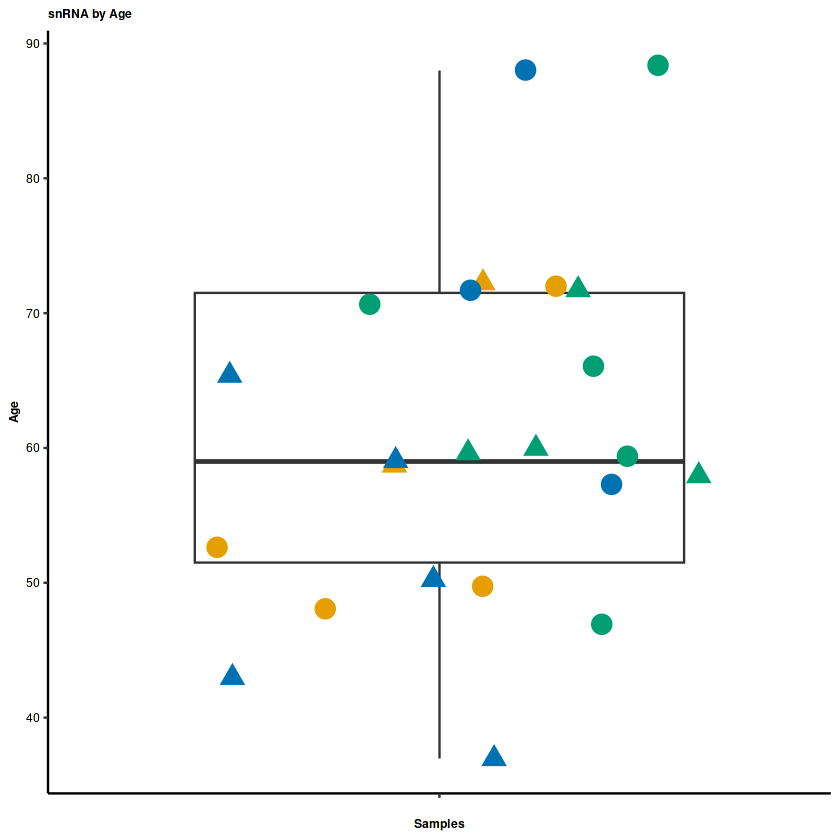

In [5]:
# snRNA age barplot
snRNA_age<-ggplot(snRNA_age_data, aes(x="",y=age))+
  geom_boxplot() +geom_jitter(aes(colour=diagnosis,shape=sex), size=5)+
  scale_color_manual(values=diagnosis_colors,name="Diagnosis")+scale_shape_manual(values=c(19,17),name="Sex")+
  labs(x="Samples",y="Age")+theme(legend.position="right",plot.title = element_text(size=7, face="bold"),
                                  legend.text=element_text(size=7),
                                  axis.line = element_line(colour = "black"),panel.grid.major = element_blank(),
                                  panel.grid.minor = element_blank(),panel.border = element_blank(),panel.background = element_blank(),
                                  axis.title.x = element_text(colour="black", size=7, face="bold"), 
                                  axis.title.y = element_text(colour="black", size=7, face="bold"),
                                  axis.text.x = element_text(colour="black", size=7), 
                                  axis.text.y = element_text(colour="black", size=7))+
  ggtitle("snRNA by Age")+NoLegend()
snRNA_age

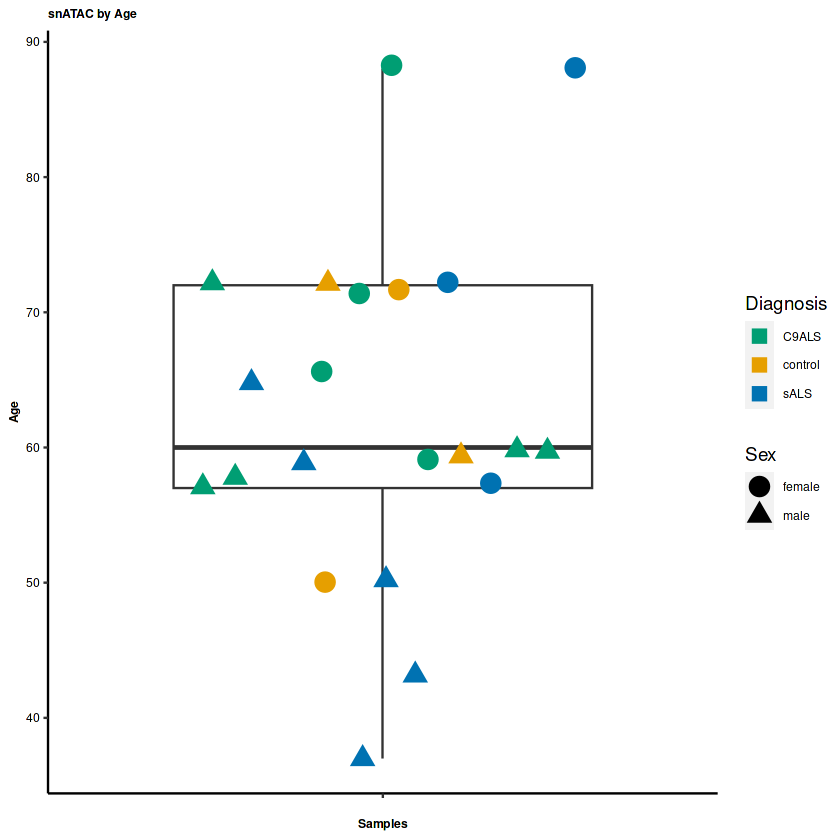

In [6]:
# snATAC age barplot
snATAC_age<-ggplot(snATAC_age_data, aes(x="",y=age)) +
  geom_boxplot() +geom_jitter(aes(colour=snATAC_diagnosis, shape=sex), size=5)+
  scale_color_manual(values=diagnosis_colors,name="Diagnosis")+scale_shape_manual(values=c(19,17),name="Sex")+
  labs(x="Samples",y="Age")+theme(legend.position="right",plot.title = element_text(size=7, face="bold"),
                                  legend.text=element_text(size=7),
                                  axis.line = element_line(colour = "black"),panel.grid.major = element_blank(),
                                  panel.grid.minor = element_blank(),panel.border = element_blank(),panel.background = element_blank(),
                                  axis.title.x = element_text(colour="black", size=7, face="bold"), 
                                  axis.title.y = element_text(colour="black", size=7, face="bold"),
                                  axis.text.x = element_text(colour="black", size=7), 
                                  axis.text.y = element_text(colour="black", size=7))+ggtitle("snATAC by Age")+
  guides(colour = guide_legend(override.aes = list(shape = 15, size = 4)))
snATAC_age

In [7]:
snRNA <- readRDS(file = "/mnt/WORKHORSE/C9ALSFTLD_multiome/objects/snRNA_final.RDS")
snATAC <- readRDS(file = "/mnt/WORKHORSE/C9ALSFTLD_multiome/objects/snATAC_final.RDS")

In [8]:
table(snRNA$class_clusters)
table(snATAC$class_clusters)


Oligodendrocytes              OPC       Astrocytes Endothelial_VLMC 
           43374             8188            15847              546 
   Microglia-PVM       Excitatory       Inhibitory 
            5174            16895            13052 


Oligodendrocytes              OPC       Astrocytes Endothelial_VLMC 
           39511             4080             7960              193 
   Microglia-PVM       Excitatory       Inhibitory 
            4714            24970            12392 

In [9]:
Idents(snRNA) <- "diagnosis"
diagnoses <- c("control", "C9ALS", "C9ALS", "sALS")
names(diagnoses) <- levels(snRNA)
snRNA <- RenameIdents(snRNA, diagnoses)
snRNA$diagnoses <- Idents(snRNA)

Idents(snATAC) <- "diagnosis"
diagnoses <- c("control", "C9ALS", "C9ALS", "sALS")
names(diagnoses) <- levels(snATAC)
snATAC <- RenameIdents(snATAC, diagnoses)
snATAC$diagnoses <- Idents(snATAC)


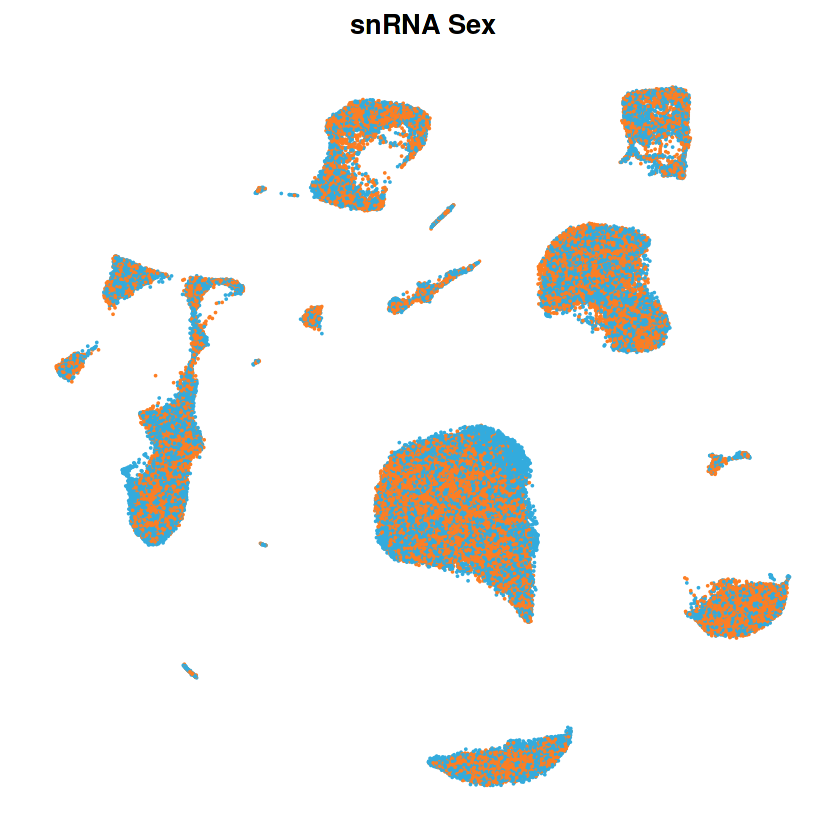

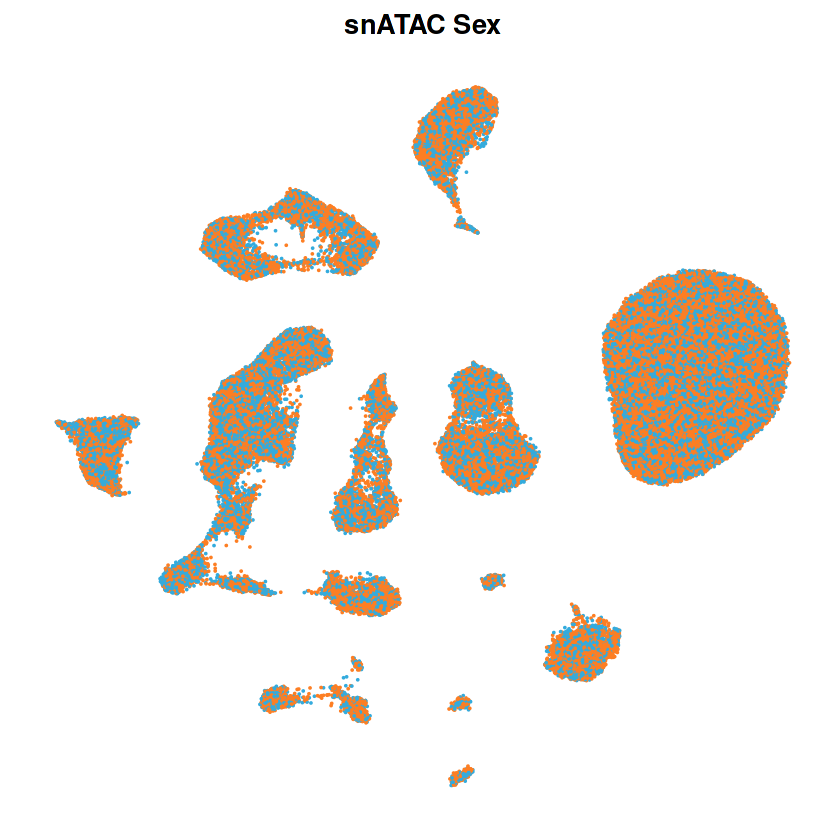

In [10]:
#snRNA/ATAC sex plots
snRNA_sex<-DimPlot_scCustom(snRNA,group.by="sex",pt.size=0.001, colors_use=sex_colors)+blank_theme+
        theme(plot.margin=unit(c(0.1,0.1,0.1,0.1),"cm"))+ggtitle("snRNA Sex")+NoLegend()
snRNA_sex
snATAC_sex<-DimPlot_scCustom(snATAC,group.by="sex",pt.size=0.001, colors_use=sex_colors)+blank_theme+
        theme(plot.margin=unit(c(0.1,0.1,0.1,0.1),"cm"))+ggtitle("snATAC Sex")+NoLegend()
snATAC_sex


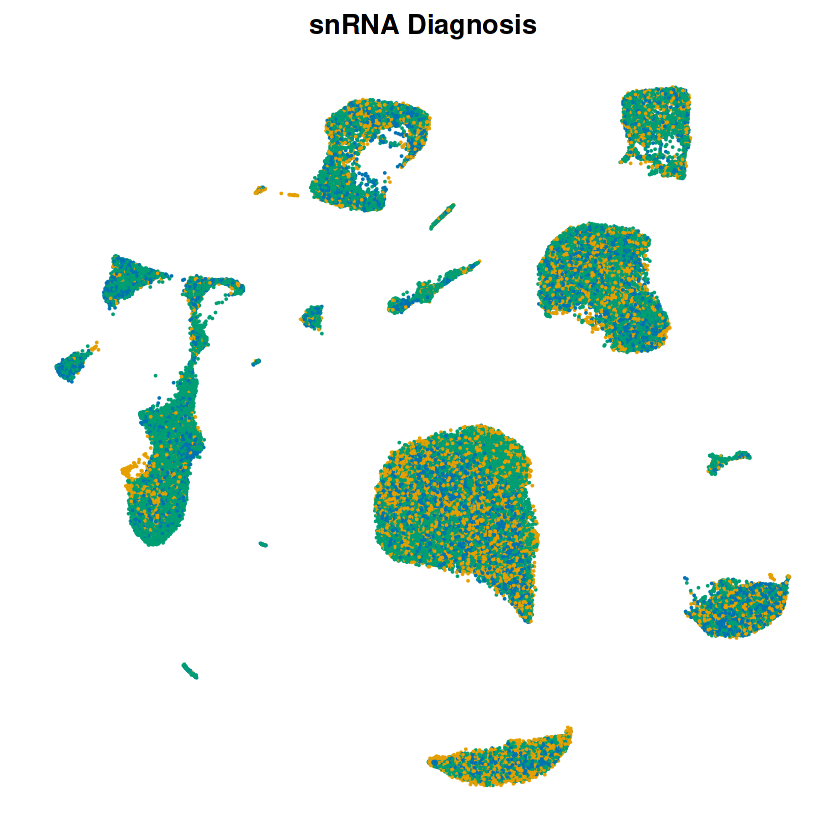

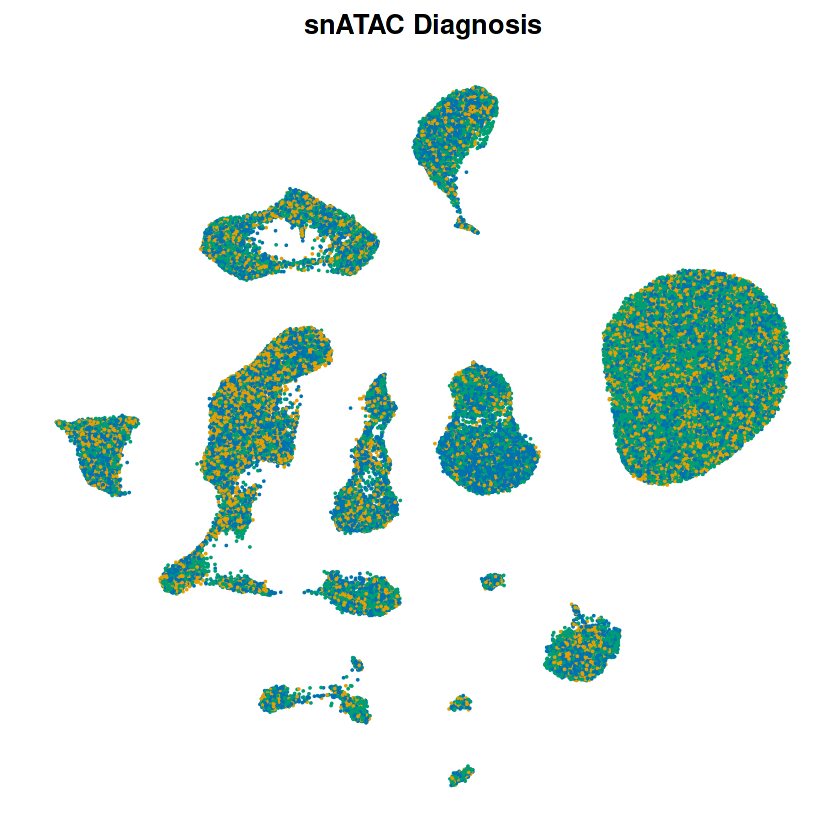

In [9]:
#snRNA/ATAC diagnosis plots
snRNA_diagnosis<-DimPlot_scCustom(snRNA,group.by="diagnoses",pt.size=0.001, colors_use=diagnosis_colors)+blank_theme+
        theme(plot.margin=unit(c(0.1,0.1,0.1,0.1),"cm"))+ggtitle("snRNA Diagnosis")+NoLegend()
snRNA_diagnosis
snATAC_diagnosis<-DimPlot_scCustom(snATAC,group.by="diagnoses",pt.size=0.001, colors_use=diagnosis_colors)+blank_theme+
        theme(plot.margin=unit(c(0.1,0.1,0.1,0.1),"cm"))+ggtitle("snATAC Diagnosis")+NoLegend()
snATAC_diagnosis

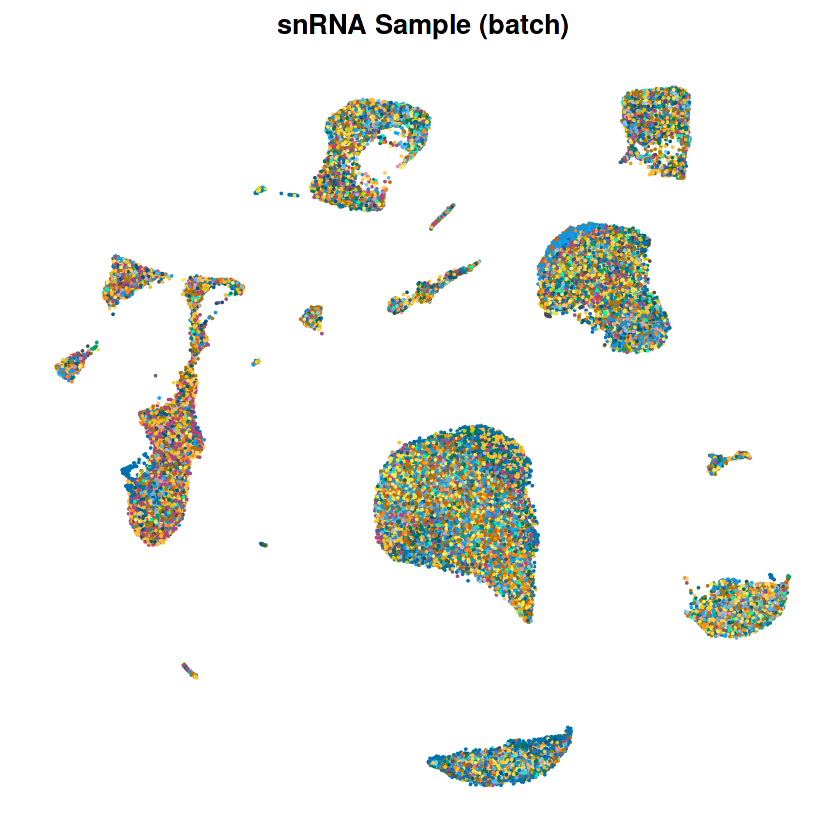

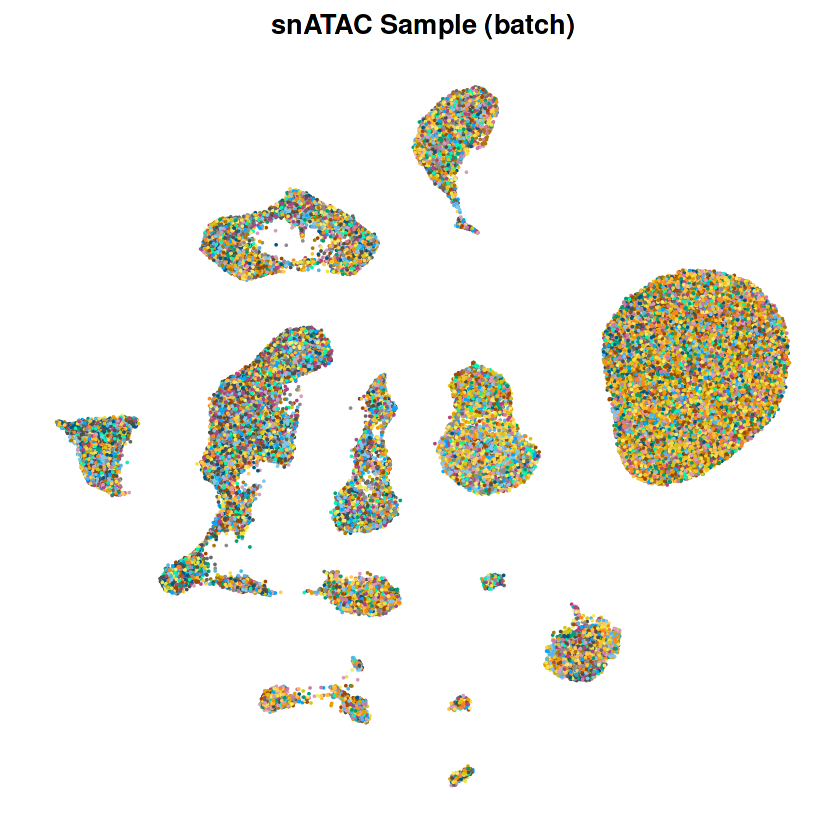

In [10]:

#23 samples
pal_snRNA <- c("#E69F00","#56B4E9","#009E73","#F0E442","#0072B2","#D55E00", #CTRL1-6
  "#666666","#AD7700","#1C91D4","#007756","#D5C711","#005685", #C9ALSFTLD1-6
  "#B14380","#4D4D4D", "#FFBE2D", #C9ALSnoFTLD1-3
  "#80C7EF","#00F6B3","#F4EB71","#06A5FF","#FF8320","#D99BBD","#8C8C8C","#FFCB57") #sALSnoFTLD1-8
#21 samples
pal_snATAC <- c("#E69F00","#56B4E9","#009E73","#F0E442", #CTRL1-4
  "#CC79A7","#666666","#AD7700","#D5C711","#005685","#A04700", #C9ALSFTLD1-3;5-7
  "#B14380","#4D4D4D","#FFBE2D", #C9ALSnoFTLD1-3
  "#80C7EF","#00F6B3","#F4EB71","#06A5FF","#FF8320","#D99BBD","#8C8C8C","#FFCB57") #sALSnoFTLD1-8
  
#snRNA/ATAC sample plots
snRNA_sample<-DimPlot_scCustom(snRNA,group.by="sample",pt.size=0.001, colors_use = pal_snRNA)+blank_theme+
        theme(plot.margin=unit(c(0.1,0.1,0.1,0.1),"cm"))+ggtitle("snRNA Sample (batch)")+NoLegend()
snRNA_sample
snATAC_sample<-DimPlot_scCustom(snATAC,group.by="sample",pt.size=0.001, colors_use = pal_snATAC)+blank_theme+
        theme(plot.margin=unit(c(0.1,0.1,0.1,0.1),"cm"))+ggtitle("snATAC Sample (batch)")+NoLegend()
snATAC_sample

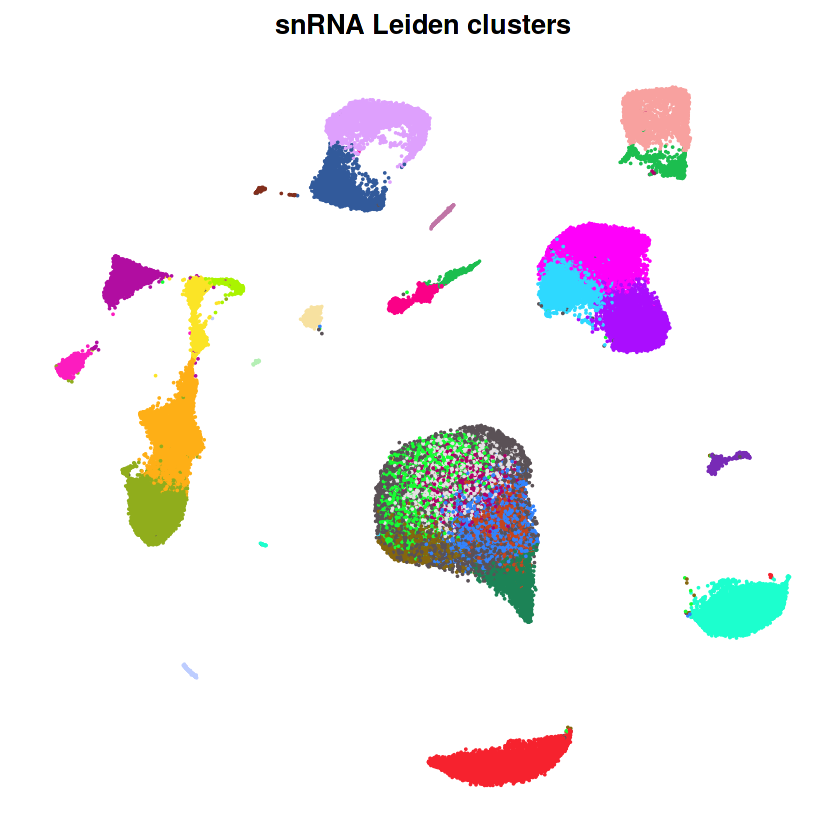

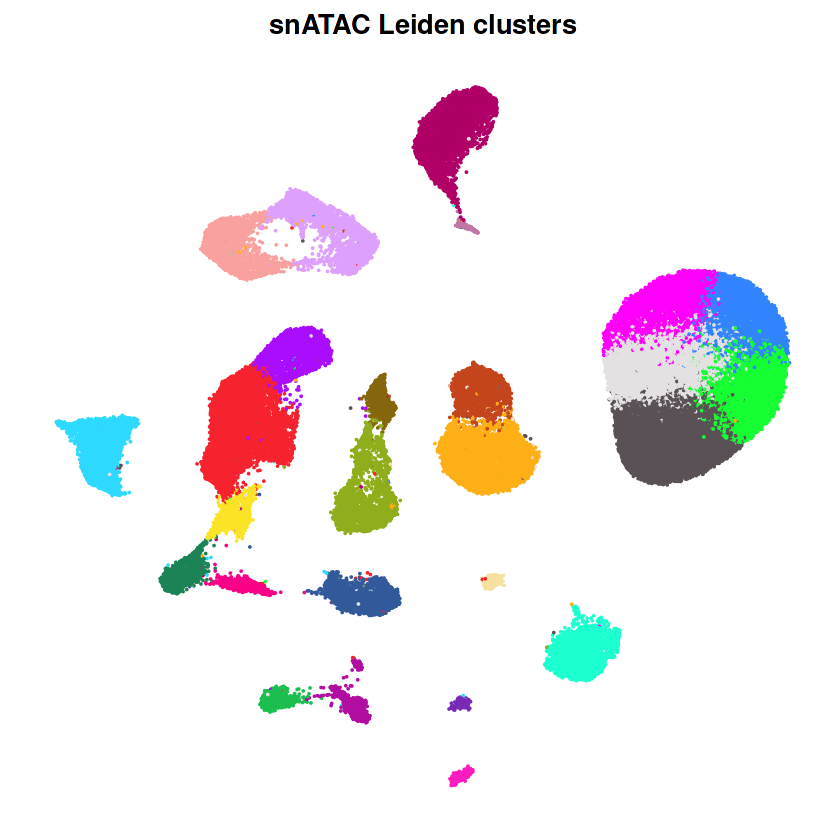

In [11]:
#snRNA/ATAC Leiden cluster plots
snRNA_Leiden<-DimPlot_scCustom(snRNA,group.by="seurat_clusters",pt.size=0.001)+blank_theme+
        theme(plot.margin=unit(c(0.1,0.1,0.1,0.1),"cm"))+ggtitle("snRNA Leiden clusters")+NoLegend()
snRNA_Leiden
snATAC_Leiden<-DimPlot_scCustom(snATAC,group.by="seurat_clusters",pt.size=0.001)+blank_theme+
        theme(plot.margin=unit(c(0.1,0.1,0.1,0.1),"cm"))+ggtitle("snATAC Leiden clusters")+NoLegend()
snATAC_Leiden

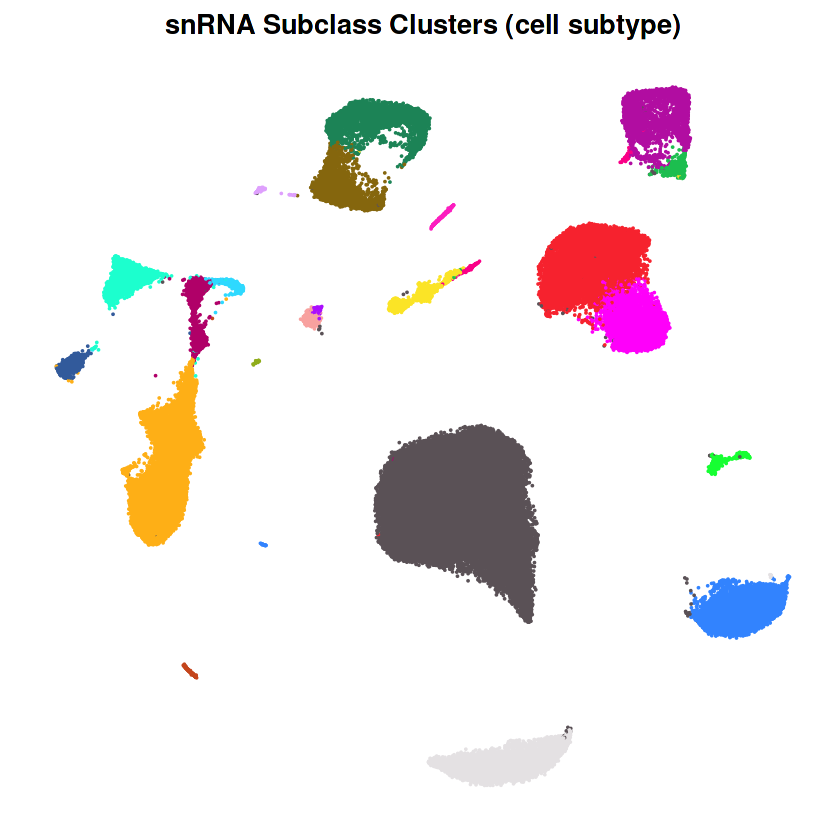

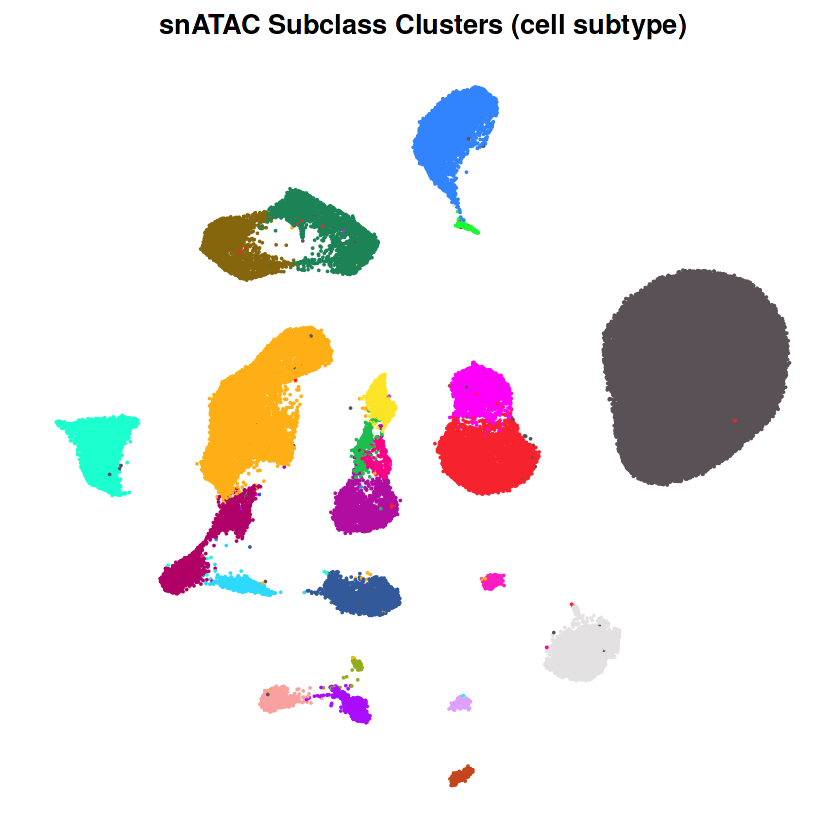

In [12]:
#snRNA/ATAC subclass clusters (cell subtype) plots
snRNAclass<-DimPlot_scCustom(snRNA,group.by="subclass_DE",pt.size=0.001, colors_use = subclass_colors)+blank_theme+
        theme(plot.margin=unit(c(0.1,0.1,0.1,0.1),"cm"))+ggtitle("snRNA Subclass Clusters (cell subtype)")+NoLegend()
snRNAclass
snATAC_subclass<-DimPlot_scCustom(snATAC,group.by="subclass_DE",pt.size=0.001, colors_use = subclass_colors)+blank_theme+
        theme(plot.margin=unit(c(0.1,0.1,0.1,0.1),"cm"))+ggtitle("snATAC Subclass Clusters (cell subtype)")+NoLegend()
snATAC_subclass

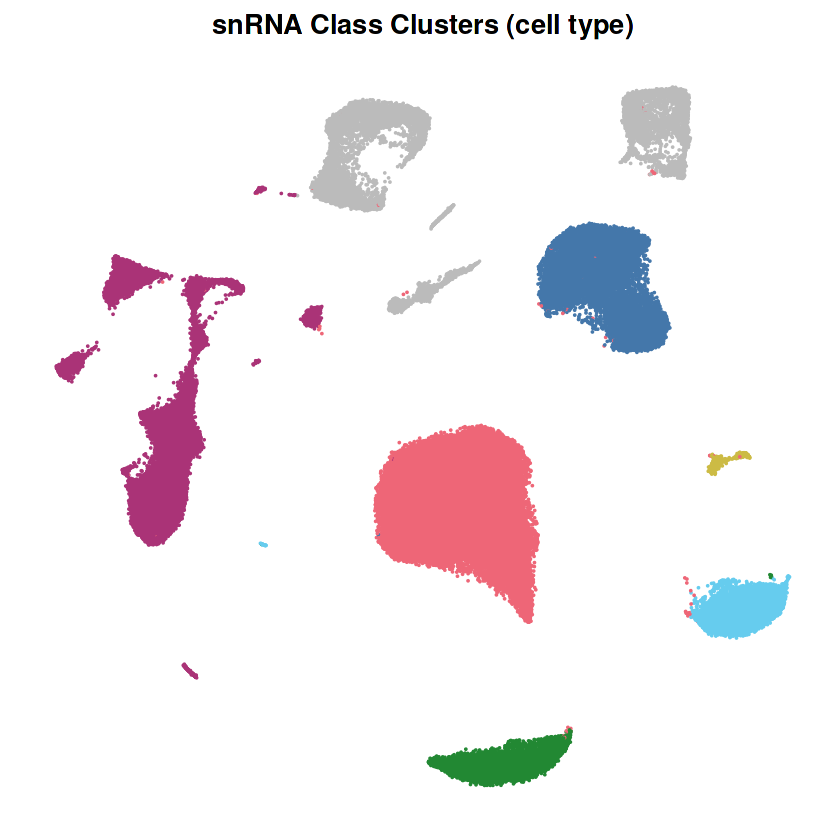

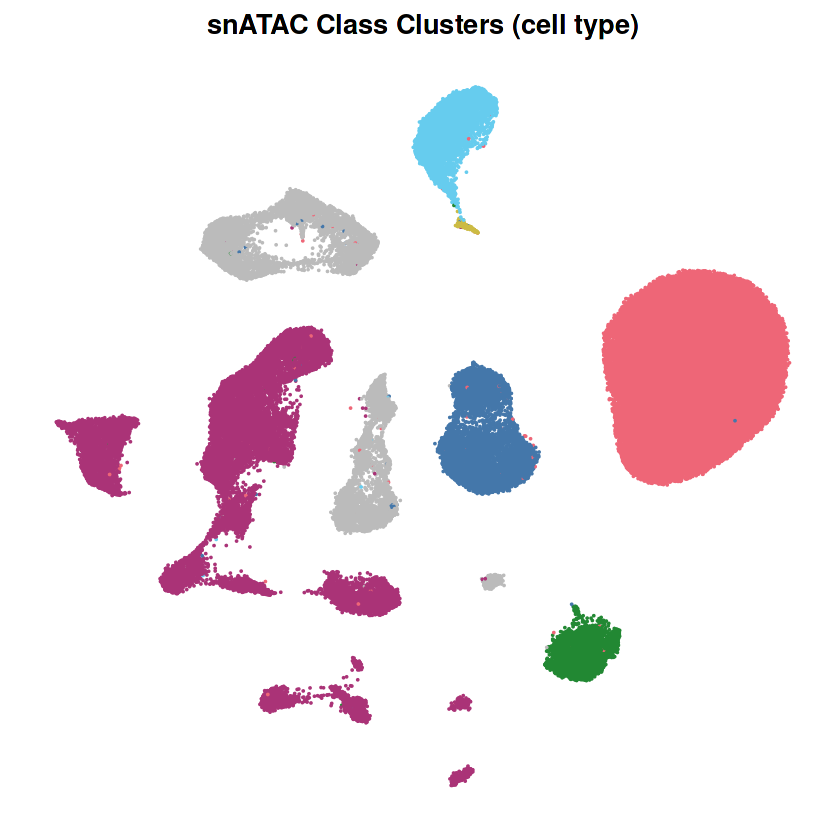

In [13]:
#snRNA/ATAC class clusters (celltype) plots
snRNA_class<-DimPlot_scCustom(snRNA,group.by="class_clusters",pt.size=0.001, colors_use = class_colors)+blank_theme+
        theme(plot.margin=unit(c(0.1,0.1,0.1,0.1),"cm"))+ggtitle("snRNA Class Clusters (cell type)")+NoLegend()
snRNA_class
snATAC_class<-DimPlot_scCustom(snATAC,group.by="class_clusters",pt.size=0.001, colors_use = class_colors)+blank_theme+
        theme(plot.margin=unit(c(0.1,0.1,0.1,0.1),"cm"))+ggtitle("snATAC Class Clusters (cell type)")+NoLegend()
snATAC_class

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,10679331,570.4,17020542,909.0,17020542,909.0
Vcells,7226993610,55137.6,11022011472,84091.3,8984988979,68550.1



      Oligo      Astro1      Astro2   Endo-VLMC   Micro-PVM         OPC 
      43374       12078        3769         546        5174        8188 
     L56-NP         L6b       L6-CT      L45-IT       L4-IT       L5-IT 
        173         159         557        1926        1811          71 
 L6-IT-Car3      L23-IT       L5-ET       L6-IT    In-LAMP5      In-VIP 
        365       10435         491         907        1233        2988 
  In-CXCL14     In-PAX6      In-SST     In-SNCG In-PVALB-Ch 
        277         710        3806        3404         634 

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


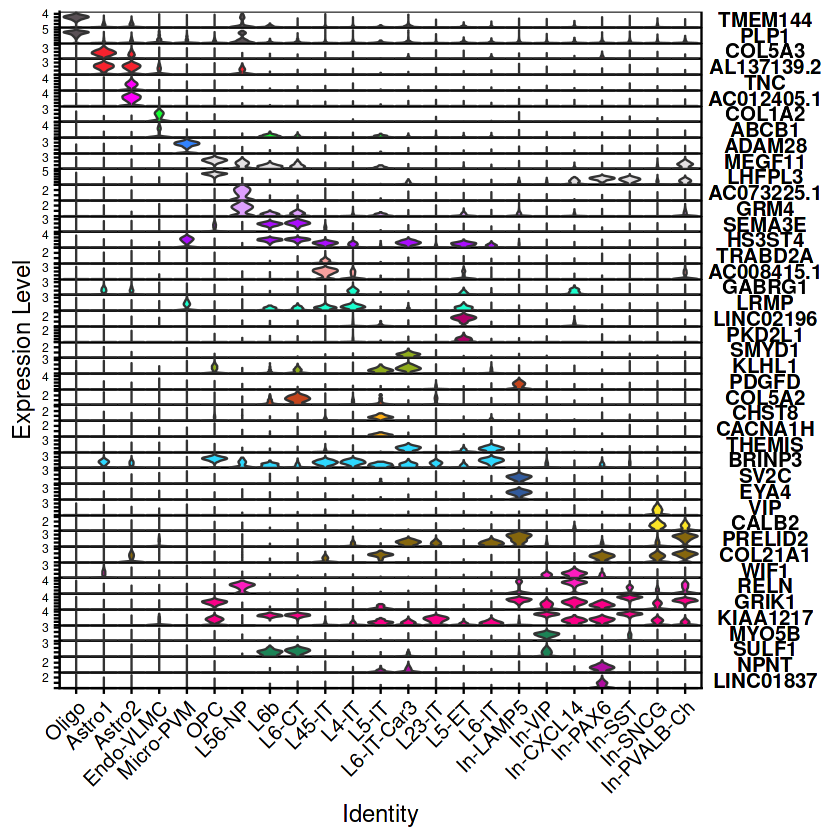

In [13]:
rm(snATAC)
gc()
library(Seurat)
library(ggplot2)
set.seed(1234)
snRNA <- readRDS(file = "/mnt/WORKHORSE/C9ALSFTLD_multiome/objects/snRNA_final_May24.RDS")
subclass_NSForest<-c("Oligo",
  "Astro1",
  "Astro2",
  "Endo-VLMC",
  "Micro-PVM",
  "OPC",
  "L56-NP",
  "L6b",
  "L6-CT",
  "L45-IT",
  "L4-IT",
  "L5-IT",
  "L6-IT-Car3",
  "L23-IT",
  "L5-ET",
  "L6-IT",
  "In-LAMP5",
  "In-VIP",
  "In-CXCL14",
  "In-PAX6",
  "In-SST",
  "In-SNCG",
  "In-PVALB-Ch")
reversed_subclass_NSForest <- rev(subclass_NSForest)
snRNA$subclass_DE <- factor(snRNA$subclass_DE, 
                            levels=subclass_NSForest)
table(snRNA$subclass_DE)
NSForest_markers<-c("TMEM144", "PLP1", #Oligo
"COL5A3", "AL137139.2", #Astro1
"TNC", "AC012405.1", #Astro2
"COL1A2", "ABCB1", #Endo-VLMC
"ADAM28", #Micro-PVM
"MEGF11", "LHFPL3", #OPC
"AC073225.1", "GRM4", #L5/6_NP
"SEMA3E", "HS3ST4", #L6b_CT
"TRABD2A", "AC008415.1", #L4/5_IT
"GABRG1", "LRMP", #L4_IT
"LINC02196", "PKD2L1", #L5_IT
"SMYD1", "KLHL1", #L6_IT_Car3
#"LINC02306", "PDGFD", #L2/3_IT_2
"PDGFD", "COL5A2",#L2/3_IT_1
"CHST8", "CACNA1H", #L5_ET
"THEMIS", "BRINP3", #L6_IT
"SV2C", "EYA4", #In_LAMP5
"VIP", "CALB2", #In_VIP
"PRELID2", "COL21A1", #In_CXCL14
"WIF1", "RELN", #In_PAX6
"GRIK1", "KIAA1217", #In_SST
"MYO5B", "SULF1", #In_SNCG
"NPNT", "LINC01837") #In_PVALB_Ch

subclass_colors <- c("#5A5156",
                     "#5A5156", #Oligo
                     "#F6222E",
                     "#F6222E", #Astro1
                     "#FE00FA", 
                     "#FE00FA", #Astro2
                     "#16FF32", 
                     "#16FF32", #Endo-VLMC
                     "#3283FE", #Micro-PVM
                     "#E4E1E3", 
                     "#E4E1E3", #OPC
                     "#DEA0FD",
                     "#DEA0FD", #L56-NP
                     "#AA0DFE", 
                     "#AA0DFE", #L6b
                     "#F8A19F", 
                     "#F8A19F", #L6-CT
                     "#1CFFCE",
                     "#1CFFCE", #L45-IT
                     "#B00068",
                     "#B00068", #L4-IT
                     "#90AD1C",
                     "#90AD1C", #L5-IT
                     "#C4451C",
                     "#C4451C", #L6-IT-Car3
                     "#FEAF16",
                     "#FEAF16", #L23-IT
                     "#2ED9FF",
                     "#2ED9FF", #L5-ET
                     "#325A9B",
                     "#325A9B", #L6-IT
                     "#FBE426",
                     "#FBE426", #In-LAMP5
                     "#85660D",
                     "#85660D", #In-VIP
                     "#FC1CBF",
                     "#FC1CBF", #In-CXCL14
                     "#FA0087",
                     "#FA0087", #In-PAX6
                     "#1C8356",
                     "#1C8356", #In-SST
                     "#B10DA1",
                     "#B10DA1", #In-SNCG
                     "#1CBE4F",
                     "#1CBE4F") #In-PVALB-Ch

NSForest_VlnPlot <- VlnPlot_scCustom(snRNA, features=NSForest_markers, 
                                     stack = TRUE, group.by="subclass_DE", 
                                     sort = F, flip = T,pt.size=0)+
  NoLegend()+scale_fill_manual(values=subclass_colors)
NSForest_VlnPlot

Loading required package: viridisLite



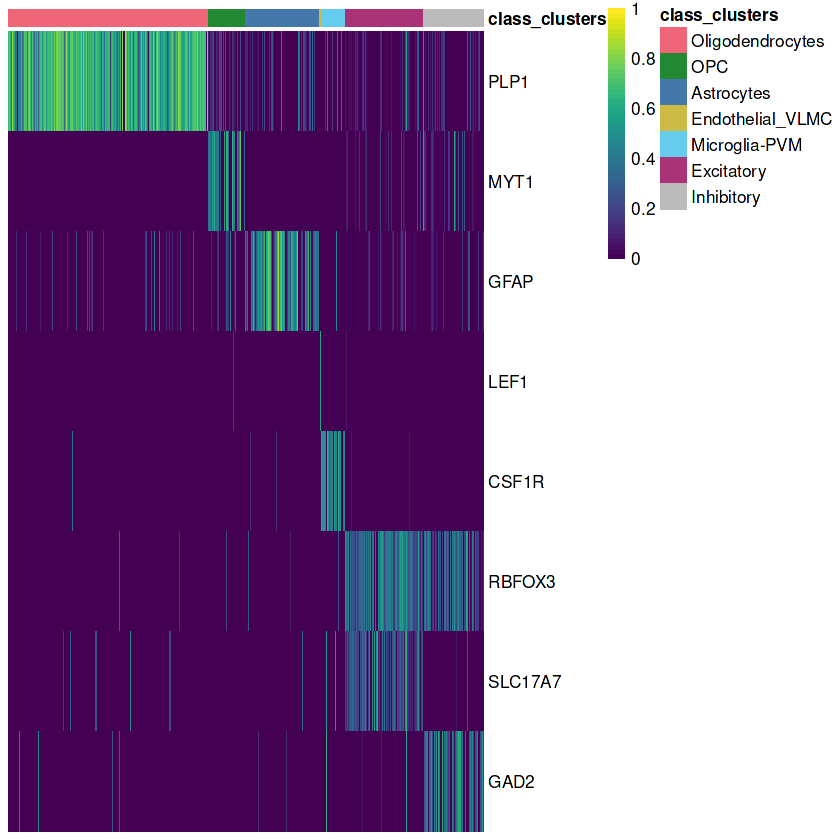

In [14]:
#Cell type (canonical) marker heatmap
library(viridis)
markers<-c("PLP1", #Oligos
           "MYT1", #OPCs
           "GFAP", #Astros
           "LEF1", #Endos
           "CSF1R", #Micros
           "RBFOX3", #Neurons
           "SLC17A7", #Excitatory
           "GAD2") #Inhibitory
snRNA_heatmap<-dittoHeatmap(snRNA, genes=markers, annot.by="class_clusters", annot.colors=class_colors,show_colnames = F, show_rownames = T,cluster_rows=F,complex=F,name="z-score", 
                            border_color="lightgray",fontsize=10,fontsize_col=8,show_legend=T,order.by="class_clusters",scaled.to.max=T,
                            heatmap.colors.max.scaled = viridis(50, direction = 1),range=seq(0,1,length.out=51))

In [31]:
fragments<-CreateFragmentObject(path="/mnt/WORKHORSE/C9ALSFTLD_multiome/fragments/fragments1.tsv.gz",cells=colnames(snATAC))
Fragments(snATAC)<-NULL
Fragments(snATAC)<-fragments

Computing hash



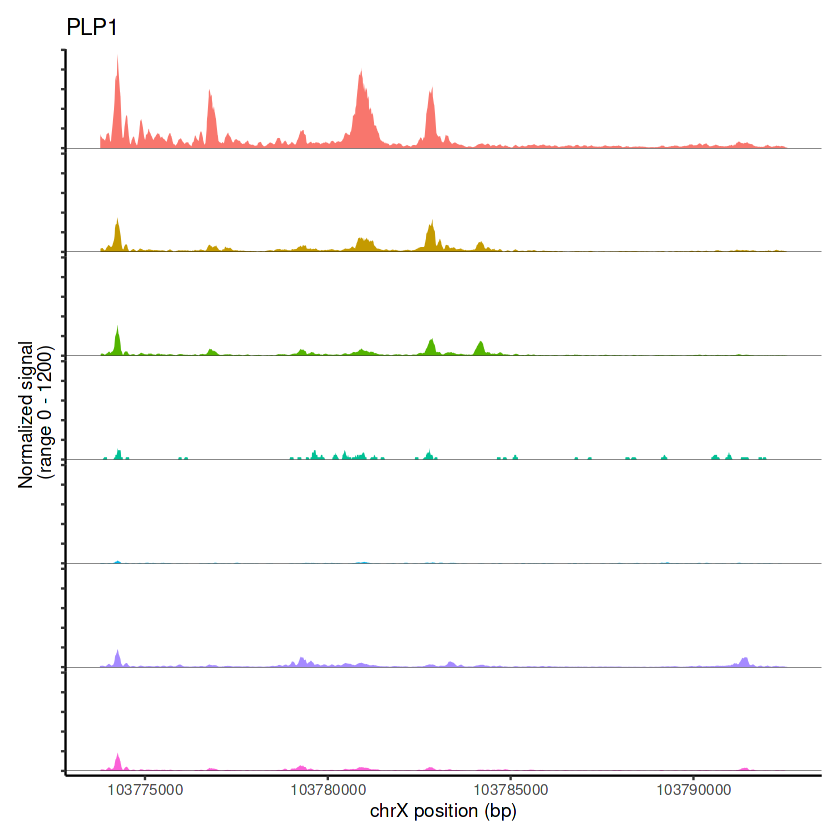

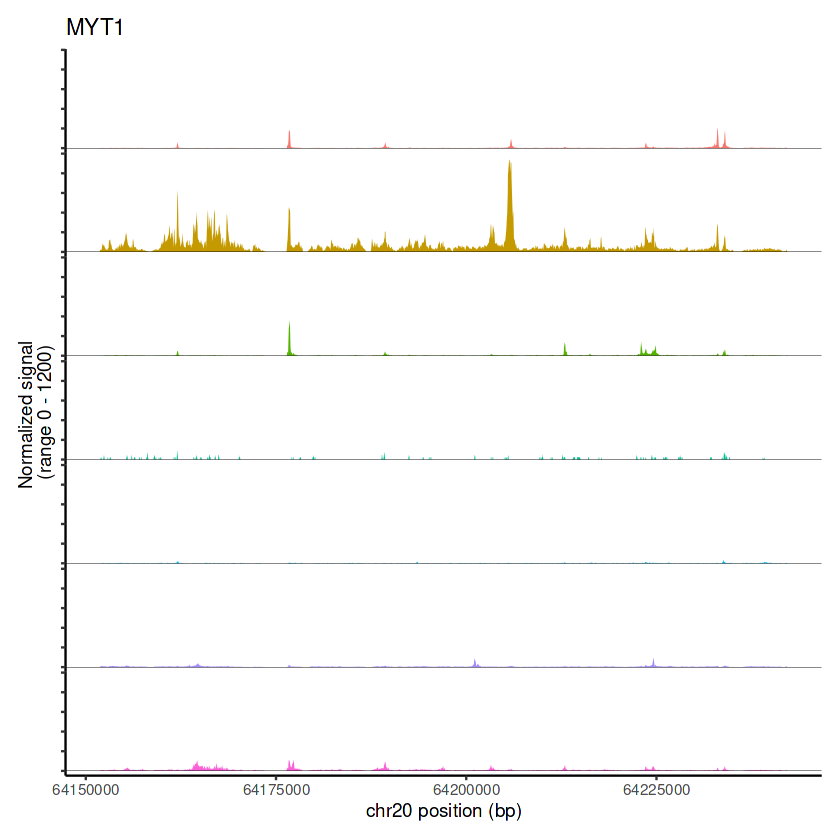

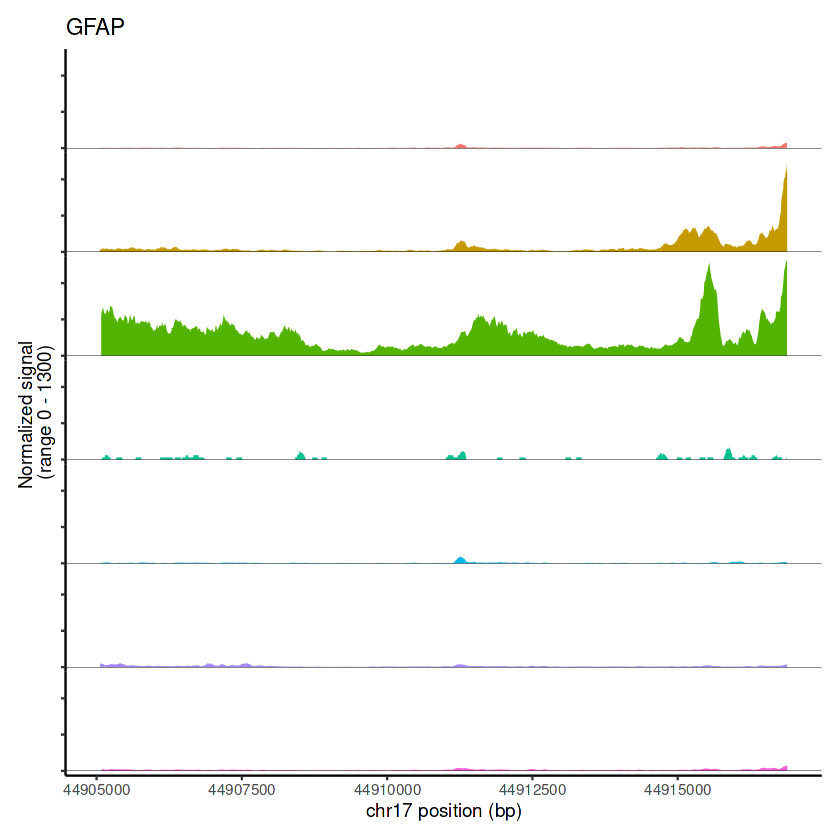

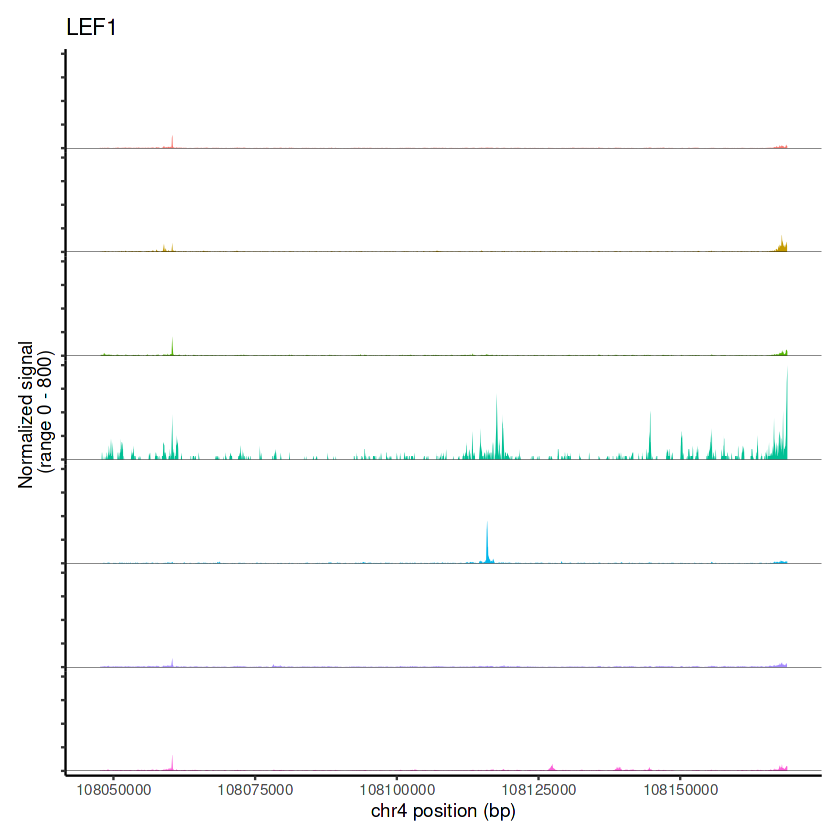

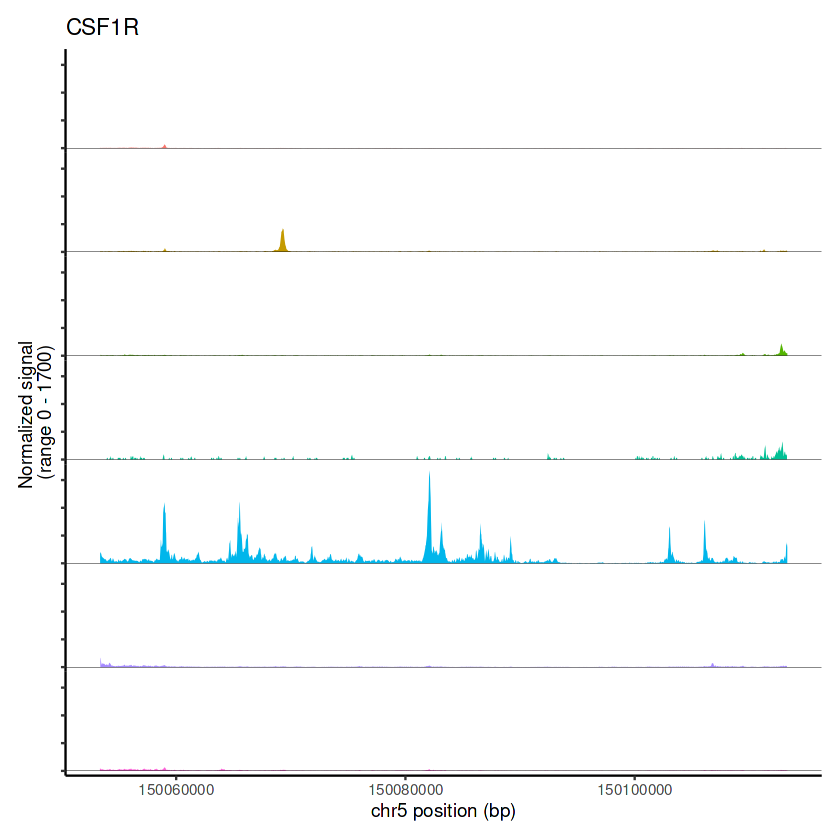

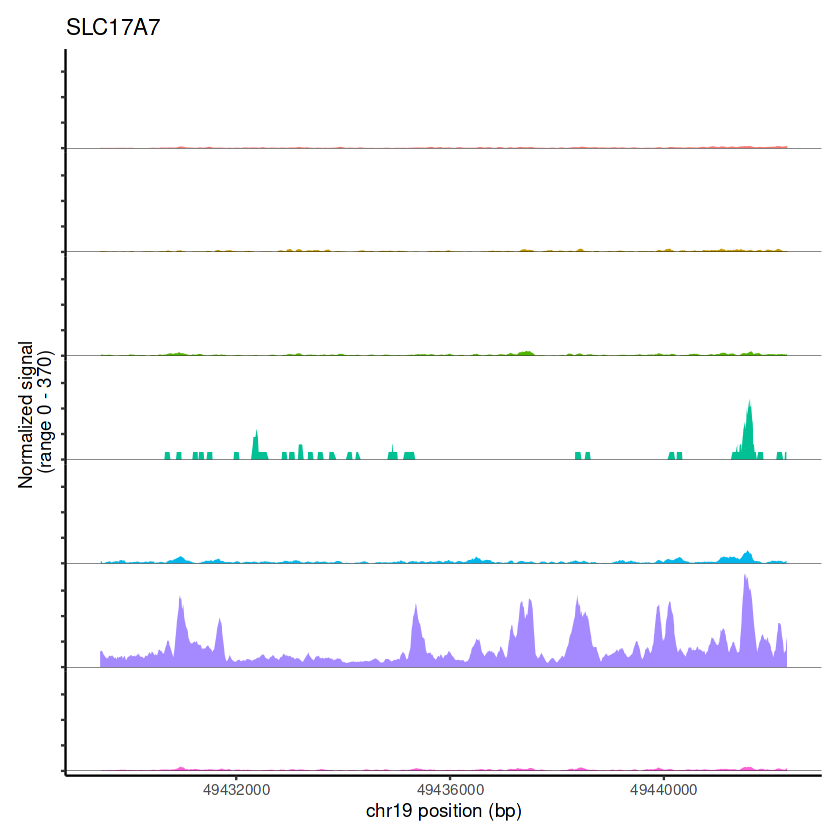

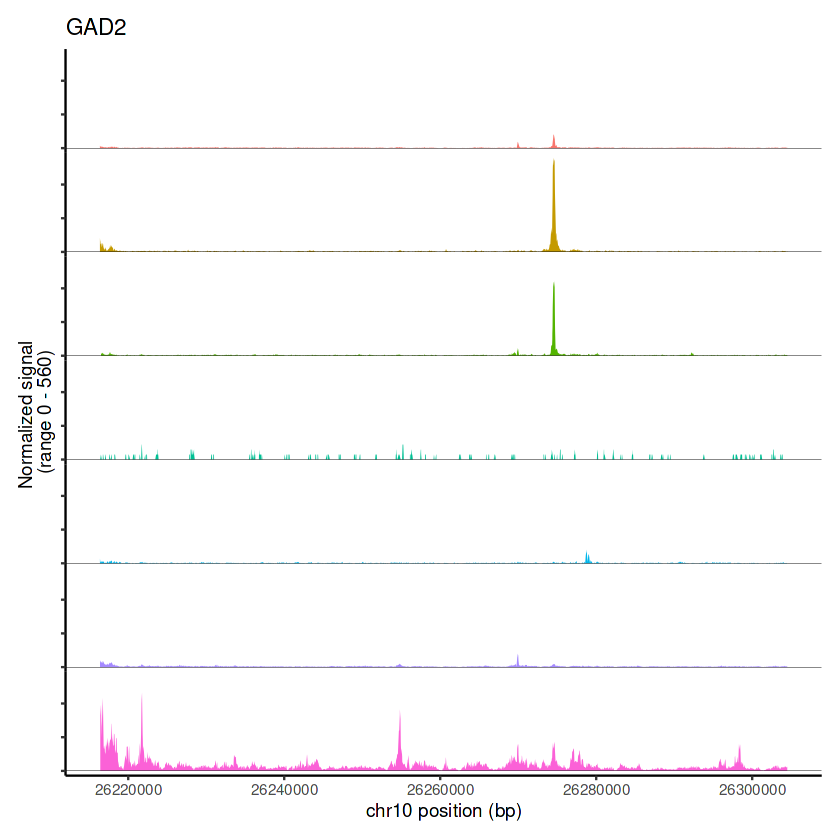

In [30]:
Idents(snATAC) <- "class_clusters"
PLP1_plot <- CoveragePlot(
  object = snATAC,  region = "PLP1",  annotation = FALSE,  peaks = FALSE
) + theme(strip.text.y.left = element_blank(),strip.background = element_blank())+ggtitle("PLP1")
PLP1_plot

MYT1_plot <- CoveragePlot(
  object = snATAC,  region = "MYT1",  annotation = FALSE,  peaks = FALSE
) + theme(strip.text.y.left = element_blank(),strip.background = element_blank())+ggtitle("MYT1")
MYT1_plot

GFAP_plot <- CoveragePlot(
  object = snATAC,  region = "GFAP",  annotation = FALSE,  peaks = FALSE
) + theme(strip.text.y.left = element_blank(),strip.background = element_blank())+ggtitle("GFAP")
GFAP_plot

LEF1_plot <- CoveragePlot(
  object = snATAC,  region = "LEF1",  annotation = FALSE,  peaks = FALSE
) + theme(strip.text.y.left = element_blank(),strip.background = element_blank())+ggtitle("LEF1")
LEF1_plot

CSF1R_plot <- CoveragePlot(
  object = snATAC,  region = "CSF1R",  annotation = FALSE,  peaks = FALSE
) + theme(strip.text.y.left = element_blank(),strip.background = element_blank())+ggtitle("CSF1R")
CSF1R_plot

SLC17A7_plot <- CoveragePlot(
  object = snATAC,  region = "SLC17A7",  annotation = FALSE,  peaks = FALSE
) + theme(strip.text.y.left = element_blank(),strip.background = element_blank())+ggtitle("SLC17A7")
SLC17A7_plot

GAD2_plot <- CoveragePlot(
  object = snATAC,  region = "GAD2",  annotation = FALSE,  peaks = FALSE
) + theme(strip.text.y.left = element_blank(),strip.background = element_blank()) +ggtitle("GAD2")
GAD2_plot

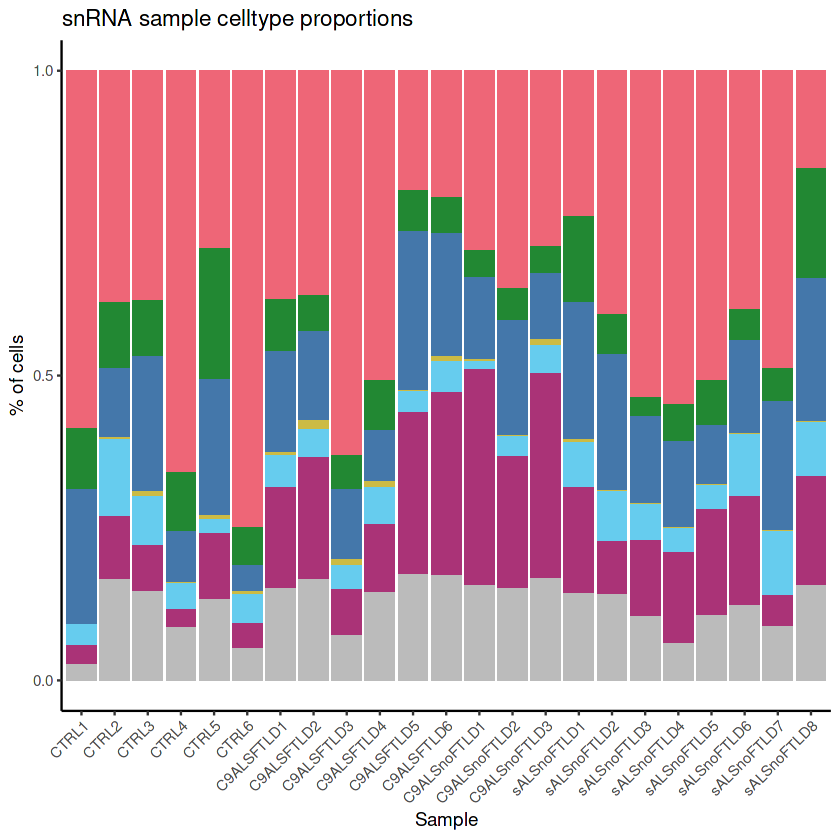

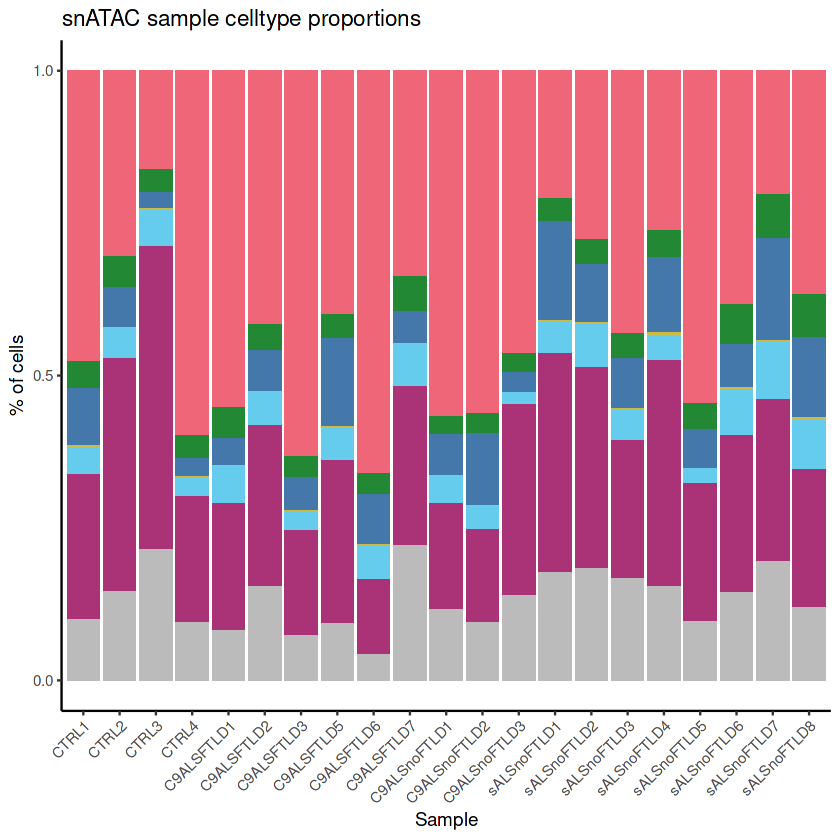

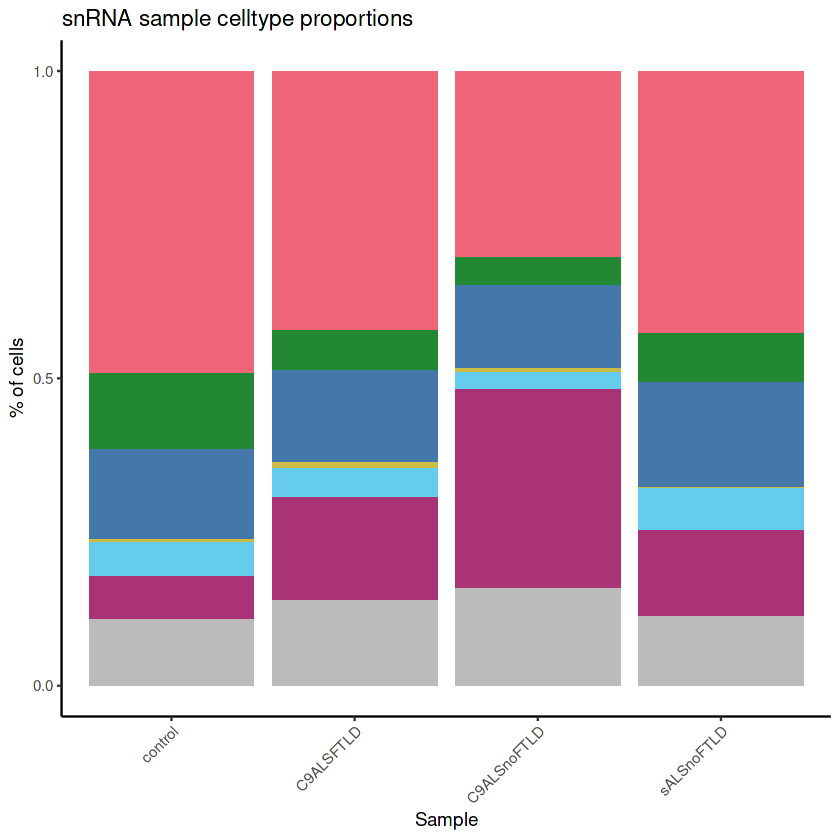

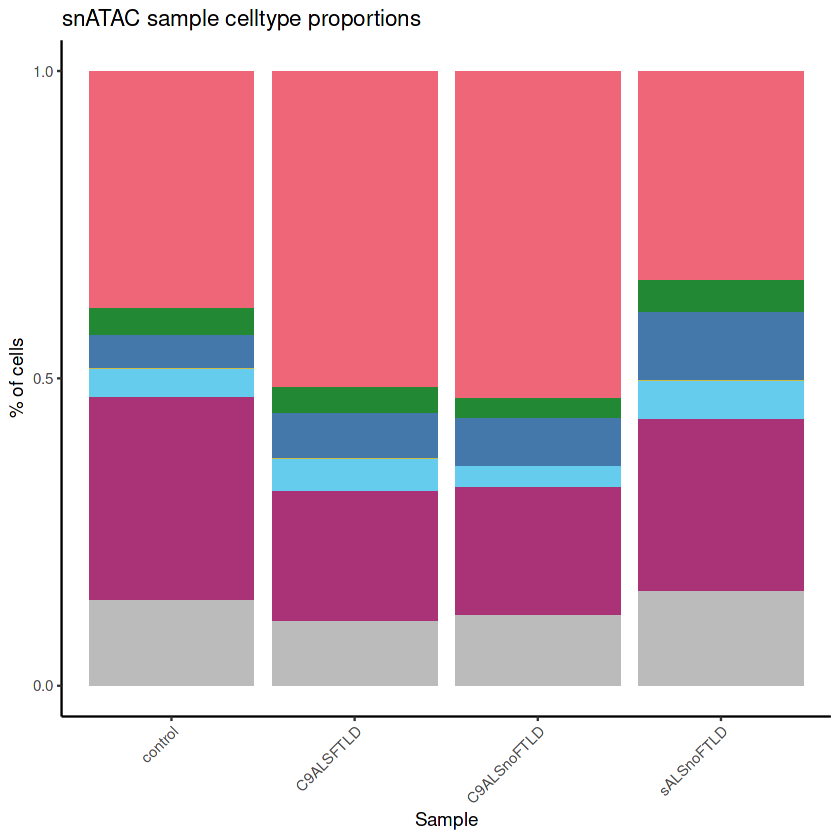

In [15]:
snRNA_sampleBarPlot<-dittoBarPlot(snRNA, "class_clusters",group.by="sample", 
                                       x.reorder=c(10,11,12,13,14,15,1,2,3,4,5,6,7,8,9,16,17,18,19,20,21,22,23),
                                       var.labels.reorder=c(6,7,1,2,5,3,4),
                                       color.panel=class_colors,
                                       scale="percent")+
                                       ggtitle("snRNA sample celltype proportions")+
                                       labs(x="Sample",y="% of cells")+
                                       NoLegend()
snRNA_sampleBarPlot

snATAC_sampleBarPlot<-dittoBarPlot(snATAC, "class_clusters",group.by="sample", 
                                        x.reorder=c(10,11,12,13,1,2,3,4,5,6,7,8,9,14,15,16,17,18,19,20,21), 
                                        var.labels.reorder=c(6,7,1,2,5,3,4),
                                        color.panel=class_colors,
                                        scale="percent")+
                                        ggtitle("snATAC sample celltype proportions")+
                                        labs(x="Sample",y="% of cells")+
                                        NoLegend()
snATAC_sampleBarPlot

snRNA_diagnosisBarPlot<-dittoBarPlot(snRNA, "class_clusters",group.by="diagnosis", 
                                       x.reorder=c(3,1,2,4),
                                       var.labels.reorder=c(6,7,1,2,5,3,4),
                                       color.panel=class_colors,
                                       scale="percent")+
                                       ggtitle("snRNA sample celltype proportions")+
                                       labs(x="Sample",y="% of cells")+
                                       NoLegend()
snRNA_diagnosisBarPlot

snATAC_diagnosisBarPlot<-dittoBarPlot(snATAC, "class_clusters",group.by="diagnosis", 
                                        x.reorder=c(3,1,2,4), 
                                        var.labels.reorder=c(6,7,1,2,5,3,4),
                                        color.panel=class_colors,
                                        scale="percent")+
                                        ggtitle("snATAC sample celltype proportions")+
                                        labs(x="Sample",y="% of cells")+
                                        NoLegend()
snATAC_diagnosisBarPlot


In [65]:
# plot correlation between gene expression and gene activity matrix
class_colors_noEndo <- c("#4477AA","#AA3377","#BBBBBB","#66CCEE","#EE6677","#228833")
celltype<-c('Astrocytes','Excitatory','Inhibitory','Microglia-PVM','Oligodendrocytes','OPC')

exp_mat <- GetAssayData(snRNA, slot='data', assay='RNA')
acc_mat <- GetAssayData(snATAC, slot='data', assay='RNA')

genes.use <- intersect(rownames(acc_mat), rownames(exp_mat))
exp_mat <- exp_mat[genes.use,]
acc_mat <- acc_mat[genes.use,]
all.equal(rownames(exp_mat), rownames(acc_mat))

df <- data.frame()

for(cur_celltype in celltype){
    cur_exp_mat <- exp_mat[,snRNA$class_clusters == cur_celltype]
    cur_acc_mat <- acc_mat[,snATAC$class_clusters == cur_celltype]
    plot_df <- data.frame(
        atac = rowSums(cur_acc_mat) / ncol(cur_acc_mat),
        rna = rowSums(cur_exp_mat) / ncol(cur_exp_mat),
        gene_name = rownames(exp_mat),
        celltypes = cur_celltype
        )
df <- rbind(df, plot_df)
}

[1] TRUE

`geom_smooth()` using formula = 'y ~ x'


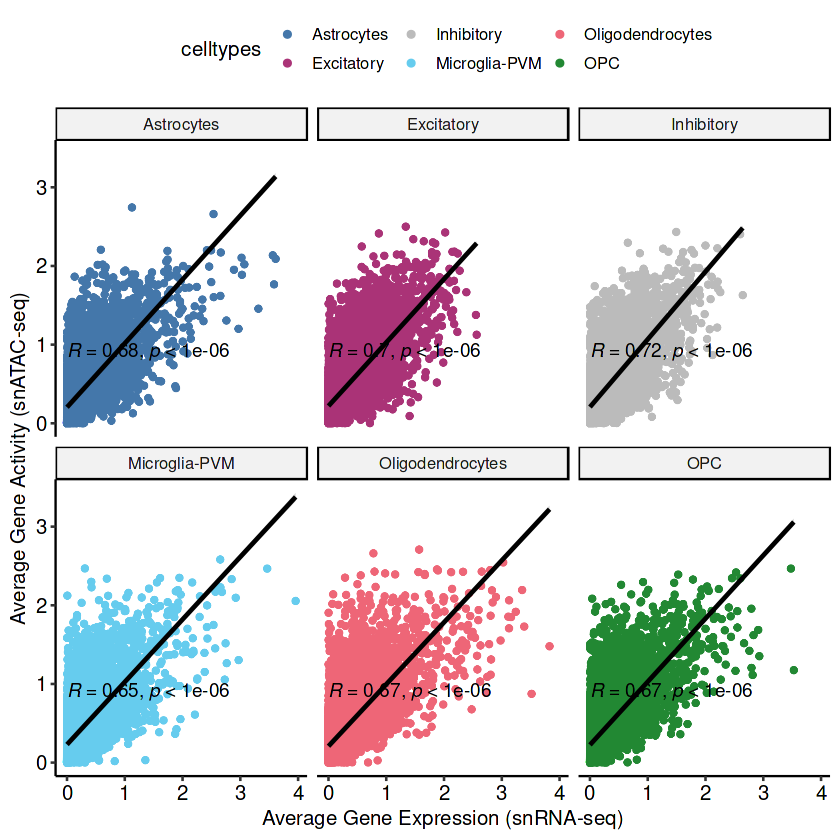

In [66]:
library(reshape2)
library(tidyverse)
library(ggrastr)
library(ggpubr)

p <- ggscatter(df, x='rna', y='atac', color='celltypes', facet.by='celltypes',
               add = "reg.line",
               add.params = list(color = "black", fill = "lightgray"),
               conf.int = TRUE,
               cor.coef = TRUE,
               cor.coeff.args = list(method = "pearson", label.x = 3, label.sep = "\n")
              )+ scale_color_manual(values=unlist(class_colors_noEndo)[1:6])

p <- ggplot(df, aes(x=rna, y=atac, color=celltypes)) +
            rasterise(geom_point(), dpi = 300) +
            geom_smooth(method = 'lm', color='black') +
            stat_cor(p.accuracy = 0.000001, r.accuracy = 0.01, color='black', label.y = 0.9, label.x=0) +
            scale_color_manual(values=unlist(class_colors_noEndo)[1:6]) +
            ylab('Average Gene Activity (snATAC-seq)') + xlab('Average Gene Expression (snRNA-seq)') + labs_pubr()

p + facet_wrap(~celltypes, ncol=3) + theme_pubr()


In [81]:
rm(snRNA)
gc()

Warning message in rm(snRNA):
“object 'snRNA' not found”


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11714575,625.7,17072921,911.8,17072921,911.8
Vcells,9794254371,74724.3,15871932269,121093.3,13226518358,100910.4


In [83]:
#Use V3 only object for visualization of Ribogenes
snRNA <- readRDS(file = "/mnt/WORKHORSE/C9ALSFTLD_multiome/objects/snRNA_V3only.RDS")

Idents(snRNA) <- "subclass_DE"
snRNA <- subset(snRNA, idents=c("L5-IT","L5-ET","L56-NP","L6b","L6-CT", "L6-IT", "L6-IT-Car3","In-CXCL14"), invert=T)
gc()
snRNA$subclass_DE <- droplevels(snRNA$subclass_DE)
snRNA$class_clusters <- droplevels(snRNA$class_clusters)
snRNA$sample <- droplevels(snRNA$sample)

Idents(snRNA) <- "diagnosis"
diagnoses <- c("control", "C9ALS", "C9ALS", "sALS")
names(diagnoses) <- levels(snRNA)
snRNA <- RenameIdents(snRNA, diagnoses)
snRNA$diagnoses <- Idents(snRNA)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,11720878,626.0,17072921,911.8,17072921,911.8
Vcells,10949260075,83536.3,15871932269,121093.3,13226518358,100910.4


In [84]:
#extract ribosomal gene names
ribo.genes <- c(rownames(snRNA@assays$RNA)[grep("^RP[1:9]", rownames(snRNA@assays$RNA))],
                rownames(snRNA@assays$RNA)[grep("^RP[L,S]", rownames(snRNA@assays$RNA))]
)
ribo.genes

ribo.list <- list()
ribo.list$ribo.genes <- ribo.genes
vln_theme <-  theme(plot.title=element_text(face="bold"),axis.line = element_line(colour = "black"),panel.grid.major = element_blank(),
                    panel.grid.minor = element_blank(),panel.border = element_blank(),panel.background = element_blank(),
                    axis.text.x = element_text(colour="black", size=9), axis.text.y = element_text(colour="black", size=9),
                    axis.title.x = element_text(colour="black", size=10, face="bold"), axis.title.y = element_text(colour="black", size=10, face="bold"))

library(UCell)
Idents(snRNA) <- "class_clusters"
snRNA <- AddModuleScore_UCell(snRNA, features = ribo.list)

[1] "RP9"         "RP1L1"       "RP1"         "RPL22"       "RPL11"      
  [6] "RPS6KA1"     "RPS8"        "RPL5"        "RPS27"       "RPS6KC1"    
 [11] "RPS7"        "RPS27A"      "RPL31"       "RPL37A"      "RPL32"      
 [16] "RPL15"       "RPSA"        "RPL14"       "RPL29"       "RPL24"      
 [21] "RPL22L1"     "RPL39L"      "RPL35A"      "RPL9"        "RPL34-AS1"  
 [26] "RPL34"       "RPS3A"       "RPL37"       "RPS23"       "RPS14"      
 [31] "RPL26L1"     "RPS18"       "RPS10-NUDT3" "RPS10"       "RPL10A"     
 [36] "RPL7L1"      "RPS12"       "RPS6KA2"     "RPS6KA2-IT1" "RPS6KA2-AS1"
 [41] "RPS20"       "RPL7"        "RPL30"       "RPL8"        "RPS6"       
 [46] "RPL35"       "RPL12"       "RPL7A"       "RPS24"       "RPLP2"      
 [51] "RPL27A"      "RPS13"       "RPS6KA4"     "RPS6KB2"     "RPS6KB2-AS1"
 [56] "RPS3"        "RPS25"       "RPS26"       "RPL41"       "RPL6"       
 [61] "RPLP0"       "RPL21"       "RPS29"       "RPL36AL"     "RPS6KL1"    
 [66] "RPS6KA5"     "RPS27L"      "RPL4"        "RPLP1"       "RPS17"      
 [71] "RPL3L"       "RPS2"        "RPS15A"      "RPL13"       "RPL26"      
 [76] "RPL23A"      "RPL23"       "RPL19"       "RPL27"       "RPS6KB1"    
 [81] "RPL38"       "RPL17"       "RPS15"       "RPL36"       "RPS28"      
 [86] "RPL18A"      "RPS16"       "RPS19"       "RPL18"       "RPL13A"     
 [91] "RPS11"       "RPS9"        "RPL28"       "RPS5"        "RPS21"      
 [96] "RPL3"        "RPS19BP1"    "RPS6KA3"     "RPS4X"       "RPS6KA6"    
[101] "RPL36A"      "RPL39"       "RPL10"       "RPS4Y1"      "RPS4Y2"     
[106] "RPL10L"

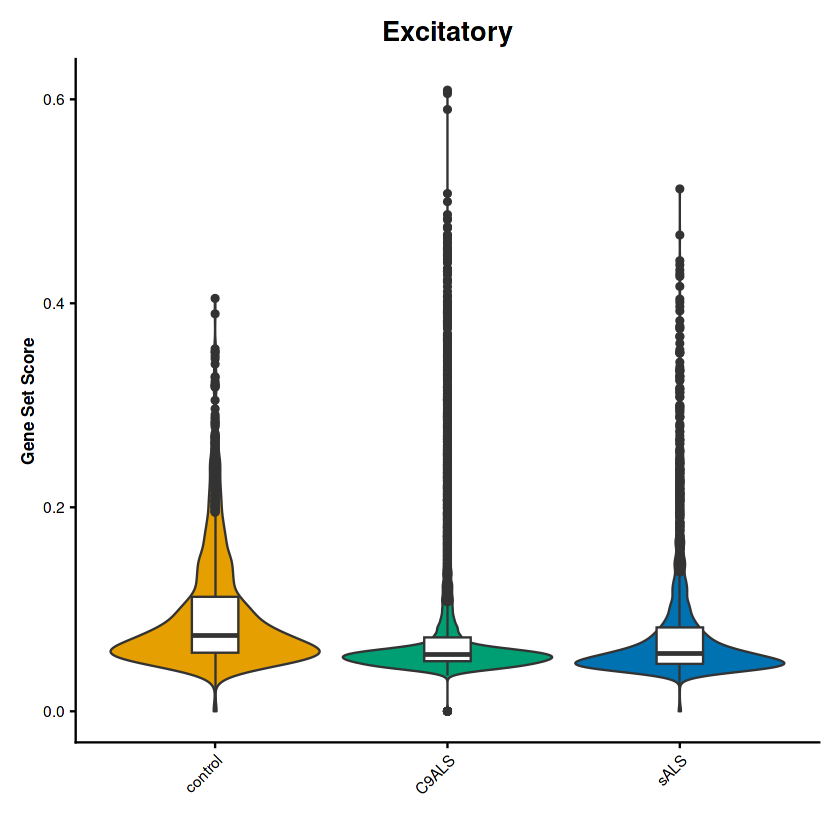

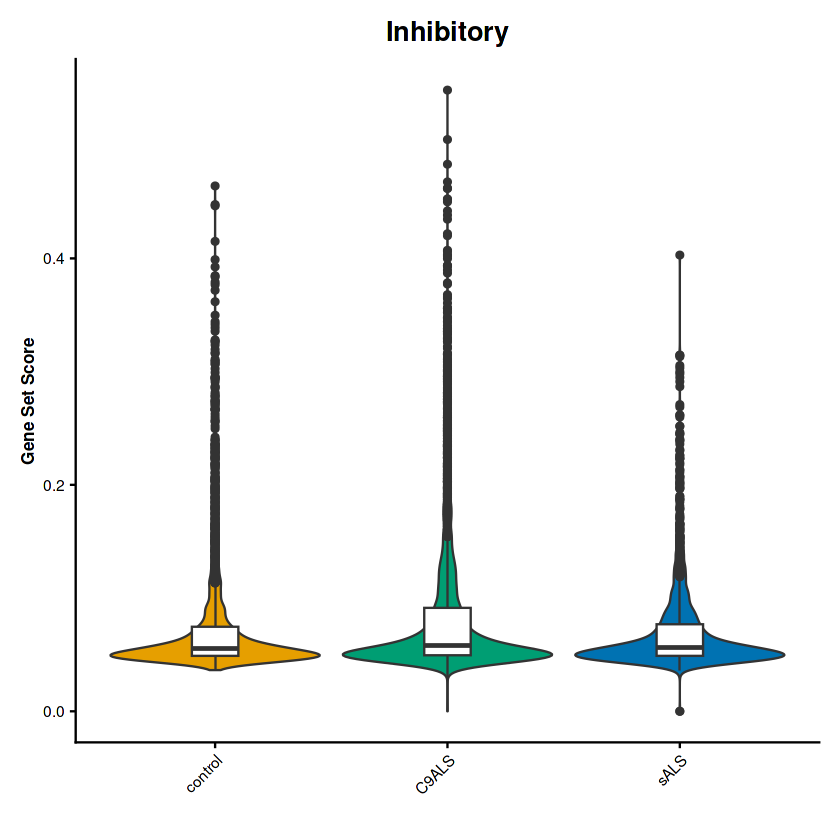

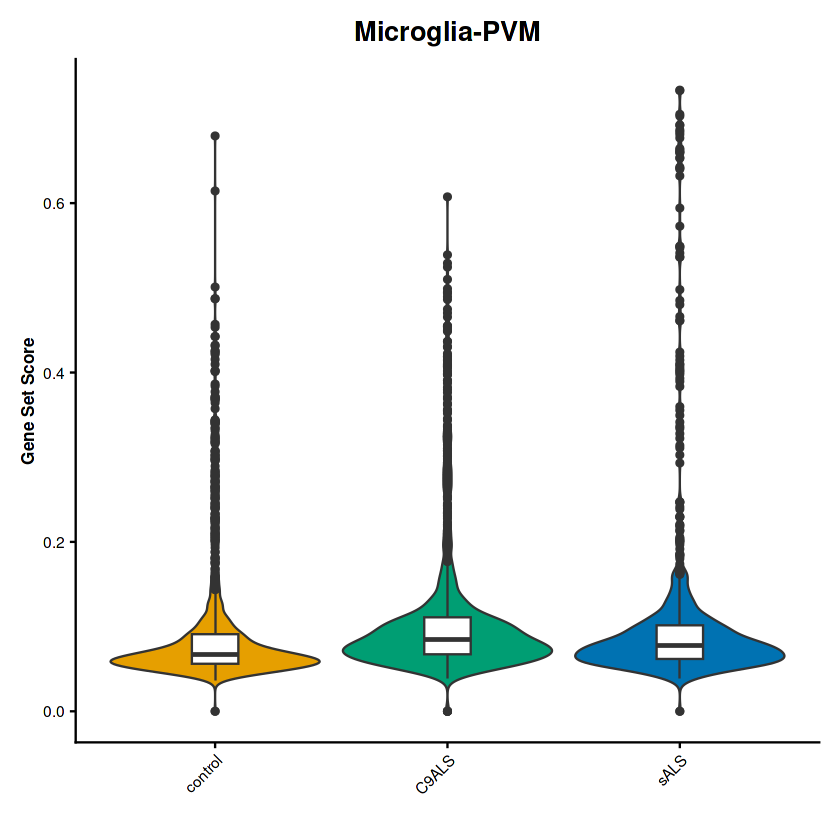

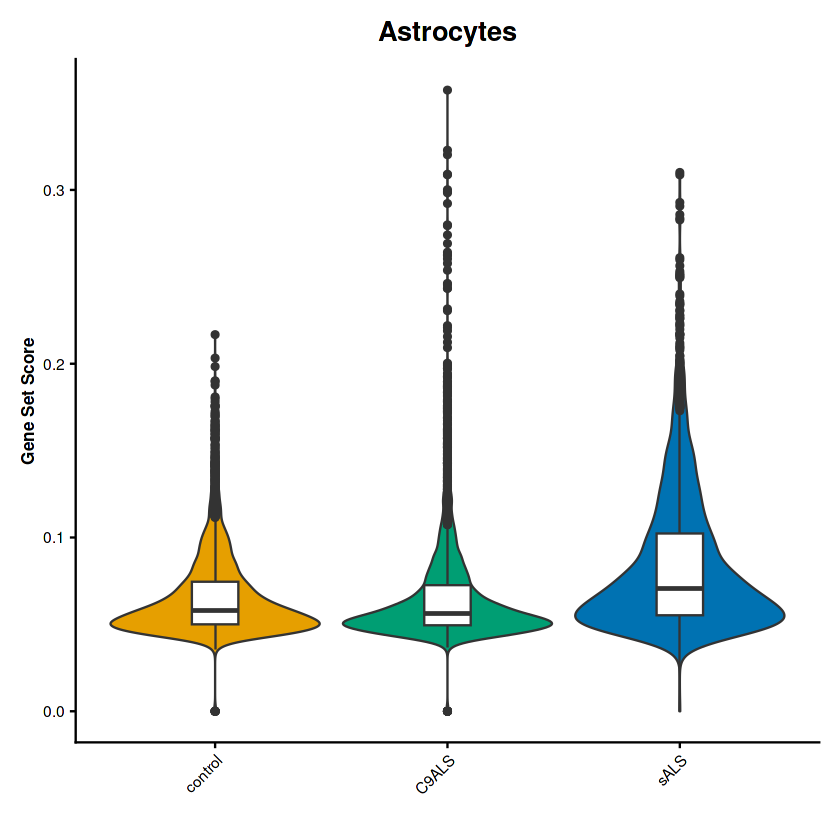

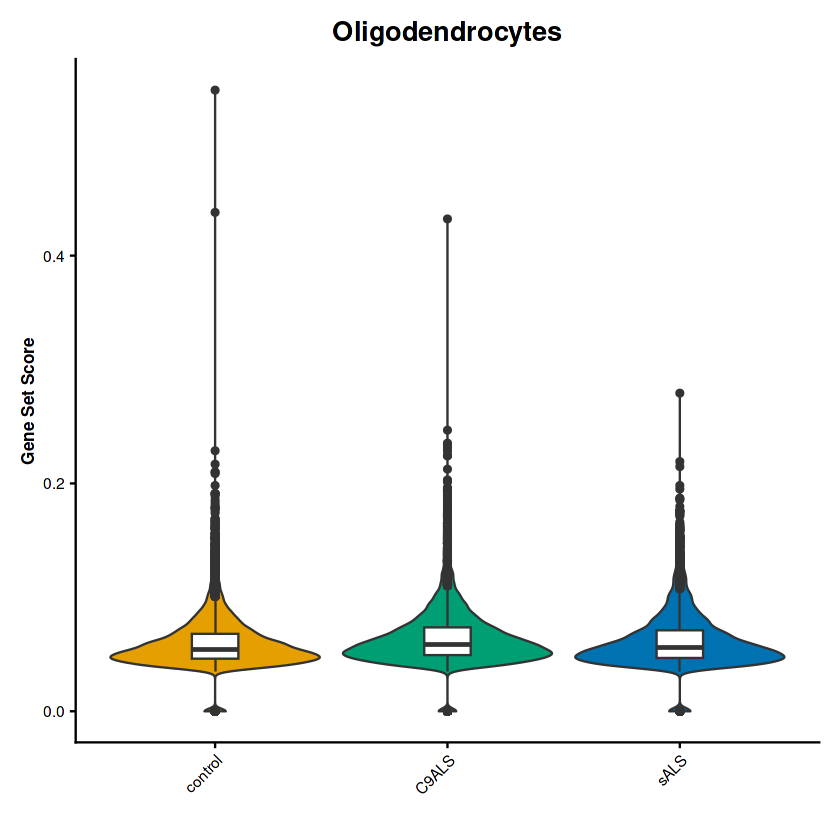

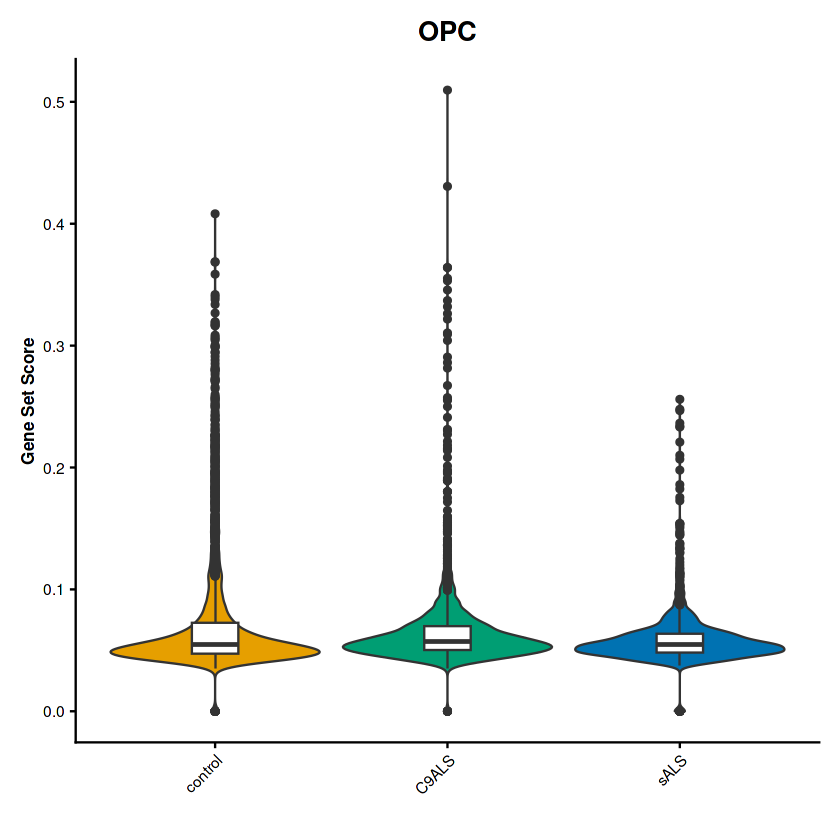

In [85]:
#Draw the module score violin plots for Supplementary Figure 4
RPLS_exc <- VlnPlot_scCustom(snRNA, features = "ribo.genes_UCell", group.by = "diagnoses", idents = "Excitatory", pt.size = 0, colors_use = diagnosis_colors) + 
  geom_boxplot(width=0.2,fill="white")+NoLegend()+labs(x="",y="Gene Set Score") + ggtitle("Excitatory") + vln_theme
RPLS_exc

RPLS_inh <- VlnPlot_scCustom(snRNA, features = "ribo.genes_UCell", group.by = "diagnoses", idents = "Inhibitory", pt.size = 0, colors_use = diagnosis_colors) + 
  geom_boxplot(width=0.2,fill="white")+NoLegend()+labs(x="",y="Gene Set Score") + ggtitle("Inhibitory") + vln_theme
RPLS_inh

RPLS_micro <- VlnPlot_scCustom(snRNA, features = "ribo.genes_UCell", group.by = "diagnoses", idents = "Microglia-PVM", pt.size = 0, colors_use = diagnosis_colors) + 
  geom_boxplot(width=0.2,fill="white")+NoLegend()+labs(x="",y="Gene Set Score") + ggtitle("Microglia-PVM") + vln_theme
RPLS_micro

RPLS_astro <- VlnPlot_scCustom(snRNA, features = "ribo.genes_UCell", group.by = "diagnoses", idents = "Astrocytes", pt.size = 0, colors_use = diagnosis_colors) + 
  geom_boxplot(width=0.2,fill="white")+NoLegend()+labs(x="",y="Gene Set Score") + ggtitle("Astrocytes") + vln_theme
RPLS_astro

RPLS_oligo <- VlnPlot_scCustom(snRNA, features = "ribo.genes_UCell", group.by = "diagnoses", idents = "Oligodendrocytes", pt.size = 0, colors_use = diagnosis_colors) + 
  geom_boxplot(width=0.2,fill="white")+NoLegend()+labs(x="",y="Gene Set Score") + ggtitle("Oligodendrocytes") + vln_theme
RPLS_oligo

RPLS_OPC <- VlnPlot_scCustom(snRNA, features = "ribo.genes_UCell", group.by = "diagnoses", idents = "OPC", pt.size = 0, colors_use = diagnosis_colors) + 
  geom_boxplot(width=0.2,fill="white")+NoLegend()+labs(x="",y="Gene Set Score") + ggtitle("OPC") + vln_theme
RPLS_OPC
